To understand the channel effectiveness to increase sales by optimizing ad spend budget for each channel

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [27]:
df=pd.read_csv('/content/Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [28]:
df.shape

(200, 5)

In [29]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [30]:
df.isna().sum()

,0
TV,0
radio,0
newspaper,0
sales,0


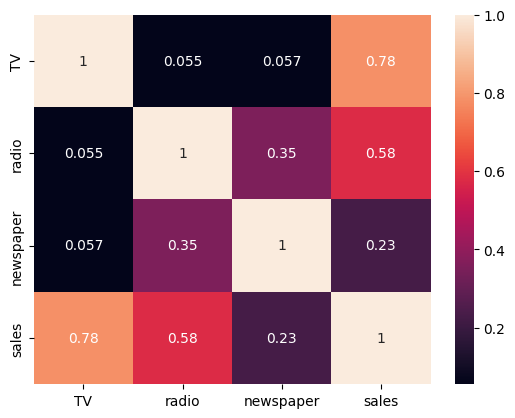

In [31]:
sns.heatmap(df.corr('pearson'),annot=True)
plt.show()



*   We could see TV has strong positive linear association with sales
*   Radio has moderate positive linear association with sales
*   Newspaper has no association with sales

**Note**:
0 to 0.25 = no linear association,
0.25 to 0.50 = weak postive linear association,
0.50 to 0.75 = moderate postive linear association,
0.75 to 1 = strong postive linear association.
Same for negative linear association.





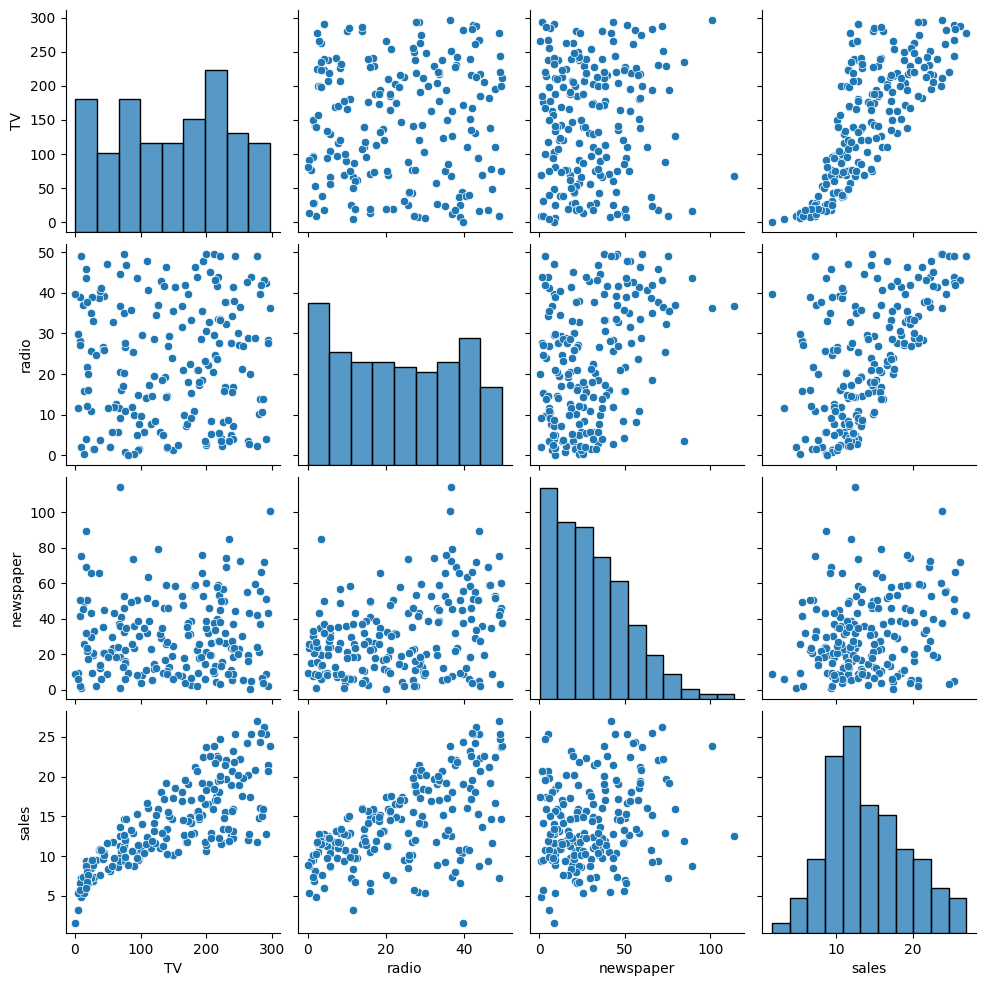

In [32]:
sns.pairplot(df)

from this plot it is clear that TV has strong positive linear relationship, radio has moderate linear relationship and newspaper has no relationship with Sales.

Also, the newspaper graph is positively skewed, let un-skew it to see if there are any visible changes in the correlation.

In [33]:
#using squareroot method to un-skew the newspaper column
df['newspaper_sqrt']=np.sqrt(df['newspaper'])
df.sample()

,TV,radio,newspaper,sales,newspaper_sqrt
191,75.5,10.8,6.0,9.9,2.44949


<Axes: ylabel='Frequency'>

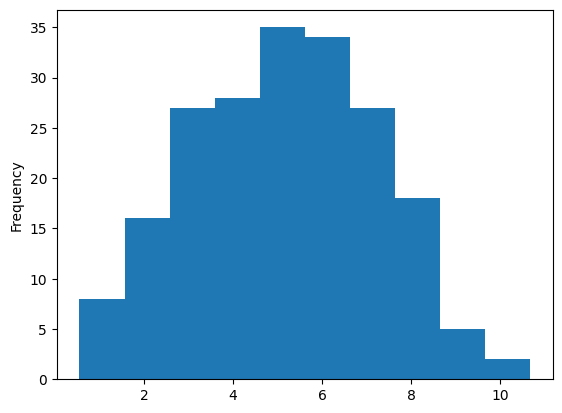

In [34]:
df['newspaper_sqrt'].plot(kind='hist')

Now, the newspaper column is normalised after treating for skewness.

In [35]:
#removing newspaper column
df.drop('newspaper',axis=1,inplace=True)
df.sample()

,TV,radio,sales,newspaper_sqrt
70,199.1,30.6,18.3,6.220932


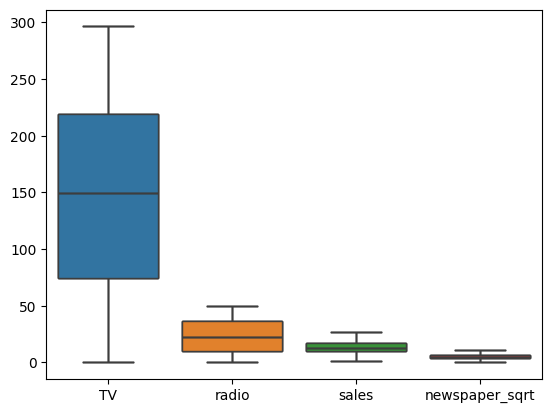

In [47]:
for i in df.columns:
  sns.boxplot(data=df)

No outliers. Now let's procees with data preparation for ML model implementation

In [49]:
X=df.drop('sales',axis=1)
y=df['sales']
X,y

(        TV  radio  newspaper_sqrt
 0    230.1   37.8        8.318654
 1     44.5   39.3        6.715653
 2     17.2   45.9        8.324662
 3    151.5   41.3        7.648529
 4    180.8   10.8        7.641989
 ..     ...    ...             ...
 195   38.2    3.7        3.714835
 196   94.2    4.9        2.846050
 197  177.0    9.3        2.529822
 198  283.6   42.0        8.136338
 199  232.1    8.6        2.949576
 
 [200 rows x 3 columns],
 0      22.1
 1      10.4
 2       9.3
 3      18.5
 4      12.9
        ... 
 195     7.6
 196     9.7
 197    12.8
 198    25.5
 199    13.4
 Name: sales, Length: 200, dtype: float64)

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=0)

In [64]:
print(f'X_train shape {X_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_train shape {y_train.shape}')
print(f'y_test shape {y_test.shape}')

X_train shape (160, 3)
X_test shape (40, 3)
y_train shape (160,)
y_test shape (40,)


In [65]:
lin_reg_model=LinearRegression()
lin_reg_model.fit(X_train,y_train)

LinearRegression()

In [68]:
y_pred_lin=lin_reg_model.predict(X_test)
y_pred_lin

array([10.04573831,  7.44458558,  7.01719695, 24.08174525, 12.01880396,
        6.53749621, 12.81856978, 15.10395606, 10.79781692, 16.32869929,
       22.88902074,  9.12342708, 10.46262108, 15.4761941 , 11.57224944,
       12.16200888, 18.78552697, 10.76860557, 15.90130375, 17.29115802,
       24.0953652 ,  9.59621553, 15.1270363 , 12.3827421 ,  5.7104117 ,
       15.22999559, 12.28482702, 20.91826693, 13.40278674,  9.04755063,
       12.99450547, 21.41393181, 18.1361001 , 21.15270896,  6.58496852,
        6.13522124,  7.89896821, 13.0405095 , 14.6777835 ,  6.18632167])

In [162]:
coefficients=lin_reg_model.coef_
coefficients

array([ 0.04456608,  0.1960919 , -0.02280273])

In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [78]:
print('MAE : ', mean_absolute_error(y_test,y_pred_lin))
print('MSE : ', mean_squared_error(y_test,y_pred_lin))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,y_pred_lin)))
r_squared=r2_score(y_test,y_pred_lin)*100
print('R-Squared : ', r_squared)

MAE :  1.367775352118167
MSE :  4.410474373319216
RMSE :  2.1001129429912138
R-Squared :  85.98489884868327


In [88]:
rf_model=RandomForestRegressor(random_state=1)
rf_model.fit(X_train,y_train)

RandomForestRegressor(random_state=1)

In [89]:
y_pred_rf=rf_model.predict(X_test)
y_pred_rf

array([10.494,  9.46 ,  9.42 , 25.027, 12.623,  9.013,  7.169, 12.683,
        8.526, 16.418, 24.374, 10.284, 10.829, 15.346, 11.657, 12.614,
       15.838,  5.336, 13.179, 17.206, 24.934, 10.51 , 15.676, 12.982,
        8.884, 14.898, 13.865, 21.868, 11.262,  7.804, 12.322, 22.583,
       15.254, 22.726,  6.266,  6.712,  9.861, 14.211, 12.491,  7.214])

In [90]:
print('MAE : ', mean_absolute_error(y_test,y_pred_rf))
print('MSE : ', mean_squared_error(y_test,y_pred_rf))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,y_pred_rf)))
r_squared=r2_score(y_test,y_pred_rf)*100
print('R-Squared : ', r_squared)

MAE :  0.6804250000000013
MSE :  0.8880943250000002
RMSE :  0.9423875662380102
R-Squared :  97.17791540246084


Random Forest Regressor gives better RMSE and R-squared value

In [127]:
from xgboost import XGBRegressor
xgb_model=XGBRegressor(random_state=2)
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=2, ...)

In [129]:
y_pred_xgb=xgb_model.predict(X_test)
y_pred_xgb

array([10.31439  ,  9.688656 ,  9.351337 , 25.47768  , 12.863568 ,
        9.029809 ,  8.540519 , 12.834906 ,  9.078284 , 16.636612 ,
       24.17616  , 10.055645 , 10.925815 , 15.371966 , 11.693344 ,
       12.51102  , 16.403038 ,  6.2740097, 11.904512 , 17.037264 ,
       25.42897  , 10.293279 , 15.324852 , 13.266444 ,  8.824962 ,
       14.977511 , 14.167051 , 21.006697 , 11.176296 ,  7.308154 ,
       12.053106 , 22.647148 , 15.786054 , 22.64332  ,  5.494272 ,
        6.6624217, 10.745115 , 14.570399 , 11.724833 ,  6.914096 ],
      dtype=float32)

In [130]:
print('MAE : ', mean_absolute_error(y_test,y_pred_xgb))
print('MSE : ', mean_squared_error(y_test,y_pred_xgb))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,y_pred_xgb)))
r_squared=r2_score(y_test,y_pred_xgb)*100
print('R-Squared : ', r_squared)

MAE :  0.7962827277183532
MSE :  1.3958468302491867
RMSE :  1.181459618543599
R-Squared :  95.56443754984012


In [101]:
df.head()

,TV,radio,sales,newspaper_sqrt
0,230.1,37.8,22.1,8.318654
1,44.5,39.3,10.4,6.715653
2,17.2,45.9,9.3,8.324662
3,151.5,41.3,18.5,7.648529
4,180.8,10.8,12.9,7.641989


In [152]:
total_sales = df['sales'].sum()

# 2. Calculate the total spend per category
total_tv_spend = df['TV'].sum()
total_radio_spend = df['radio'].sum()
total_newspaper_spend = df['newspaper_sqrt'].sum()

# 3. Proportional contributions based on spend
contribution_tv = total_tv_spend / (total_tv_spend + total_radio_spend + total_newspaper_spend) * 100
contribution_radio = total_radio_spend / (total_tv_spend + total_radio_spend + total_newspaper_spend) * 100
contribution_newspaper = total_newspaper_spend / (total_tv_spend + total_radio_spend + total_newspaper_spend) * 100

print(contribution_tv)
print(contribution_radio)
print(contribution_newspaper)

83.81051060086084
13.259892334654449
2.9295970644847147


In [125]:
#Since RandomForest gave us the least rmse value, we will use that to build gradio interface
def prediction(TV,radio,newspaper_sqrt):
  inputs_df=pd.DataFrame([[TV,radio,newspaper_sqrt]],columns=["TV","radio","newspaper_sqrt"])
  output=rf_model.predict(inputs_df)
  return output[0]
prediction(230.1,37.8,22.1)

21.91999999999998

From this we could know how much amount of ad spend will cause the changes in Sale quantity.


**Setting up Gradio**

In [131]:
%%capture
pip install gradio

In [135]:
# create gradio application and add dropdown for categorical variables
import gradio as gr
TV=gr.Number(label="TV ad spend")
radio=gr.Number(label="Radio ad spend")
newspaper_sqrt=gr.Number(label="Newspaper ad spend")

demo=gr.Interface(fn=prediction,inputs=[TV,radio,newspaper_sqrt],
                  outputs=gr.Number(label="Predicted Sale Quantity"),title='Sale Qty Predictor wrt Ad Spend Budget')
demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://1d9e97b3ba773d885b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
